In [26]:
# Menambahkan library yang diperlukan
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from google.colab import files
from zipfile import ZipFile
from shutil import move, rmtree
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [27]:
# Downlodas Datasets
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2020-10-11 04:35:25--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.28MB/s    in 39s     

2020-10-11 04:36:05 (7.88 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [28]:
# Extract datasets
zip_datasets = "/tmp/rockpaperscissors.zip"
dir_zip = ZipFile(zip_datasets, "r")
dir_zip.extractall("/tmp")
dir_zip.close()

# Buat lokasi untuk validasi dan train
dir_datasets = "/tmp/rockpaperscissors/"
train_dir = os.path.join(dir_datasets, "train")
val_dir = os.path.join(dir_datasets, "val")

In [29]:
# Hapus file tidak penting
rmtree("/tmp/__MACOSX")
rmtree("/tmp/rockpaperscissors/rps-cv-images")
os.remove("/tmp/rockpaperscissors.zip")

In [30]:
# Membuat folder untuk train dan val
folders = ["rock", "paper", "scissors"]
if not os.path.exists(train_dir) and not os.path.exists(val_dir):
    for folder in folders:
        os.makedirs(os.path.join(train_dir, folder))
        os.makedirs(os.path.join(val_dir, folder))

In [31]:
# Menyalin data rock, paper dan scissor ke train dan val
data_rock = os.listdir("/tmp/rockpaperscissors/rock")
data_paper = os.listdir("/tmp/rockpaperscissors/paper")
data_scissors = os.listdir("/tmp/rockpaperscissors/scissors")
i = 0
for data in range(len(data_rock) + len(data_paper) + len(data_scissors)):
    if data < len(data_paper):
        if i < 1314:
            move("/tmp/rockpaperscissors/paper/" 
                 + data_paper[data], 
                 "/tmp/rockpaperscissors/train/paper/" 
                 + data_paper[data])
        else:
            move("/tmp/rockpaperscissors/paper/" 
                 + data_paper[data],
                 "/tmp/rockpaperscissors/val/paper/" 
                 + data_paper[data])
        i += 1

    if data < len(data_rock):
        if i < 1314:
            move("/tmp/rockpaperscissors/rock/" 
                 + data_rock[data], 
                 "/tmp/rockpaperscissors/train/rock/" 
                 + data_rock[data])
        else:
            move("/tmp/rockpaperscissors/rock/" 
                 + data_rock[data],
                 "/tmp/rockpaperscissors/val/rock/" 
                 + data_rock[data])
        i += 1

    if data < len(data_scissors):
        if i < 1314:
            move("/tmp/rockpaperscissors/scissors/" 
                 + data_scissors[data],
                 "/tmp/rockpaperscissors/train/scissors/" 
                 + data_scissors[data])
        else:
            move("/tmp/rockpaperscissors/scissors/" 
                 + data_scissors[data], 
                 "/tmp/rockpaperscissors/val/scissors/"
                 + data_scissors[data])
        i += 1
        
# Hapus folder kosong        
for folder in folders: 
    os.rmdir("/tmp/rockpaperscissors/" + folder)

In [32]:
# Kita samakan dulu datanya
train_data = ImageDataGenerator(
    rescale=1./225,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    validation_split=.20,
    zoom_range=0.2,
    fill_mode="nearest",
    brightness_range=[0.5, 1.0]
)

test_data = ImageDataGenerator(
    rescale=1./225,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    validation_split=.20,
    zoom_range=0.2,
    fill_mode="nearest",
    brightness_range=[0.5, 1.0]
)

In [33]:
# Kita buat klasisfikasi antar kelas
train_gen = train_data.flow_from_directory(
    train_dir,
    target_size=(100, 150),
    batch_size=256,
    class_mode="categorical"
)

val_gen = test_data.flow_from_directory(
    val_dir,
    target_size=(100, 150),
    batch_size=256,
    class_mode="categorical"
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [34]:
# Kita buat Neural Networknya
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", 
                               input_shape=(100, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(256, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(1028, activation="relu"),
        tf.keras.layers.Dense(2056, activation="relu"),
        tf.keras.layers.Dense(3, activation="softmax")
])

In [35]:
# Kita buat compilernya
model.compile(loss="poisson",
              optimizer=tf.keras.optimizers.SGD(momentum=0.9),
              metrics=["accuracy"])

In [36]:
# Kita jalankan Neural network
hist = model.fit(
    train_gen,
    steps_per_epoch=6,
    epochs=95,
    validation_data=val_gen,
    validation_steps=4,
    verbose=1,
    callbacks=tf.keras.callbacks.TerminateOnNaN(),
    workers=2
).history

Epoch 1/95
6/6 [==============================] - 19s 3s/step - loss: 0.7004 - accuracy: 0.3333 - val_loss: 0.7002 - val_accuracy: 0.3295
Epoch 2/95
6/6 [==============================] - 14s 2s/step - loss: 0.6999 - accuracy: 0.3333 - val_loss: 0.6995 - val_accuracy: 0.3295
Epoch 3/95
6/6 [==============================] - 14s 2s/step - loss: 0.6992 - accuracy: 0.3744 - val_loss: 0.6991 - val_accuracy: 0.5297
Epoch 4/95
6/6 [==============================] - 14s 2s/step - loss: 0.6984 - accuracy: 0.4178 - val_loss: 0.6985 - val_accuracy: 0.3169
Epoch 5/95
6/6 [==============================] - 14s 2s/step - loss: 0.6980 - accuracy: 0.3356 - val_loss: 0.6980 - val_accuracy: 0.3146
Epoch 6/95
6/6 [==============================] - 14s 2s/step - loss: 0.6975 - accuracy: 0.3333 - val_loss: 0.6974 - val_accuracy: 0.3124
Epoch 7/95
6/6 [==============================] - 17s 3s/step - loss: 0.6968 - accuracy: 0.3394 - val_loss: 0.6966 - val_accuracy: 0.3364
Epoch 8/95
6/6 [==================

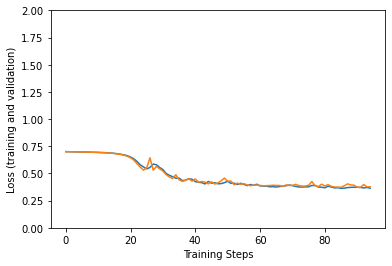

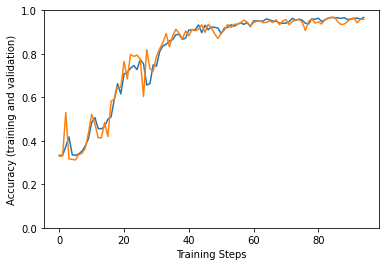

In [37]:
# Kita lihat perkembangan NN kita
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])

Saving photo_2020-10-11_10-22-55.jpg to photo_2020-10-11_10-22-55 (1).jpg
photo_2020-10-11_10-22-55.jpg
paper


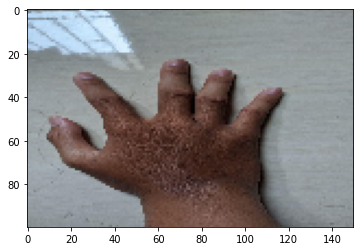

In [39]:
# Kita test gambar
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(100, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=32)

    print(fn)
    if classes[0][0] == 1.0:
        print("paper")
    elif classes[0][1] == 1.0:
        print("rock")
    else:
        print("scissors")